***
# <font color=purple>**Using Machine Learning To Predict Weather in Charlotte, NC**</font> 
***

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib  
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_absolute_error, median_absolute_error
from sklearn.preprocessing import StandardScaler
matplotlib.style.use('ggplot')

## Raw Data Preview

#### Charlotte, NC Climate Data from 2013 to 2018 (downloaded from the NOAA NCEI site - https://www.ncei.noaa.gov/)

In [2]:
clt_climate_df = pd.read_csv("All Datasets/Charlotte_climate_info_2013_to_2018.csv", low_memory=False)
clt_climate_df.head()

STATION                     STATION_NAME  ELEVATION  LATITUDE  \
0  WBAN:13881  CHARLOTTE DOUGLAS AIRPORT NC US      221.9   35.2236   
1  WBAN:13881  CHARLOTTE DOUGLAS AIRPORT NC US      221.9   35.2236   
2  WBAN:13881  CHARLOTTE DOUGLAS AIRPORT NC US      221.9   35.2236   
3  WBAN:13881  CHARLOTTE DOUGLAS AIRPORT NC US      221.9   35.2236   
4  WBAN:13881  CHARLOTTE DOUGLAS AIRPORT NC US      221.9   35.2236   

   LONGITUDE           DATE REPORTTPYE   HOURLYSKYCONDITIONS HOURLYVISIBILITY  \
0   -80.9552  6/1/2013 0:52      FM-15  FEW:02 55 SCT:04 250               10   
1   -80.9552  6/1/2013 1:00      FM-12                   NaN              NaN   
2   -80.9552  6/1/2013 1:52      FM-15             BKN:07 65               10   
3   -80.9552  6/1/2013 2:52      FM-15             BKN:07 75               10   
4   -80.9552  6/1/2013 3:52      FM-15  FEW:02 75 SCT:04 110               10   

  HOURLYPRSENTWEATHERTYPE                ...                  \
0                     NaN                ...                   
1                     NaN                ...                   
2                     NaN                ...                   
3                     NaN                ...                   
4                     NaN                ...                   

  MonthlyMaxSeaLevelPressureTime MonthlyMinSeaLevelPressureValue  \
0                          -9999                             NaN   
1                          -9999                             NaN   
2                          -9999                             NaN   
3                          -9999                             NaN   
4                          -9999                             NaN   

  MonthlyMinSeaLevelPressureDate MonthlyMinSeaLevelPressureTime  \
0                          -9999                          -9999   
1                          -9999                          -9999   
2                          -9999                          -9999   
3                          -9999                          -9999   
4                          -9999                          -9999   

  MonthlyTotalHeatingDegreeDays MonthlyTotalCoolingDegreeDays  \
0                           NaN                           NaN   
1                           NaN                           NaN   
2                           NaN                           NaN   
3                           NaN                           NaN   
4                           NaN                           NaN   

  MonthlyDeptFromNormalHeatingDD MonthlyDeptFromNormalCoolingDD  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   
3                            NaN                            NaN   
4                            NaN                            NaN   

  MonthlyTotalSeasonToDateHeatingDD  MonthlyTotalSeasonToDateCoolingDD  
0                               NaN                                NaN  
1                               NaN                                NaN  
2                               NaN                                NaN  
3                               NaN                                NaN  
4                               NaN                                NaN  

[5 rows x 90 columns]

## Data Preparation & Cleanup

In [3]:
# list all the columns to determine which is needed
clt_climate_df.columns

Index(['STATION', 'STATION_NAME', 'ELEVATION', 'LATITUDE', 'LONGITUDE', 'DATE',
       'REPORTTPYE', 'HOURLYSKYCONDITIONS', 'HOURLYVISIBILITY',
       'HOURLYPRSENTWEATHERTYPE', 'HOURLYDRYBULBTEMPF', 'HOURLYDRYBULBTEMPC',
       'HOURLYWETBULBTEMPF', 'HOURLYWETBULBTEMPC', 'HOURLYDewPointTempF',
       'HOURLYDewPointTempC', 'HOURLYRelativeHumidity', 'HOURLYWindSpeed',
       'HOURLYWindDirection', 'HOURLYWindGustSpeed', 'HOURLYStationPressure',
       'HOURLYPressureTendency', 'HOURLYPressureChange',
       'HOURLYSeaLevelPressure', 'HOURLYPrecip', 'HOURLYAltimeterSetting',
       'DAILYMaximumDryBulbTemp', 'DAILYMinimumDryBulbTemp',
       'DAILYAverageDryBulbTemp', 'DAILYDeptFromNormalAverageTemp',
       'DAILYAverageRelativeHumidity', 'DAILYAverageDewPointTemp',
       'DAILYAverageWetBulbTemp', 'DAILYHeatingDegreeDays',
       'DAILYCoolingDegreeDays', 'DAILYSunrise', 'DAILYSunset', 'DAILYWeather',
       'DAILYPrecip', 'DAILYSnowfall', 'DAILYSnowDepth',
       'DAILYAverageStatio

In [4]:
# Create new dataframe with necessary columns only
new_clt_climate_df = clt_climate_df.loc[:, ['STATION_NAME','DATE','DAILYMaximumDryBulbTemp',
       'DAILYMinimumDryBulbTemp', 'DAILYAverageDryBulbTemp', 'DAILYAverageRelativeHumidity',
       'DAILYAverageDewPointTemp', 'DAILYPrecip']]
new_clt_climate_df.head()

STATION_NAME           DATE  DAILYMaximumDryBulbTemp  \
0  CHARLOTTE DOUGLAS AIRPORT NC US  6/1/2013 0:52                      NaN   
1  CHARLOTTE DOUGLAS AIRPORT NC US  6/1/2013 1:00                     83.0   
2  CHARLOTTE DOUGLAS AIRPORT NC US  6/1/2013 1:52                      NaN   
3  CHARLOTTE DOUGLAS AIRPORT NC US  6/1/2013 2:52                      NaN   
4  CHARLOTTE DOUGLAS AIRPORT NC US  6/1/2013 3:52                      NaN   

   DAILYMinimumDryBulbTemp  DAILYAverageDryBulbTemp  \
0                      NaN                      NaN   
1                     70.0                     76.0   
2                      NaN                      NaN   
3                      NaN                      NaN   
4                      NaN                      NaN   

   DAILYAverageRelativeHumidity  DAILYAverageDewPointTemp DAILYPrecip  
0                           NaN                       NaN         NaN  
1                           NaN                       NaN         NaN  
2                           NaN                       NaN         NaN  
3                           NaN                       NaN         NaN  
4                           NaN                       NaN         NaN

In [5]:
# Reindex by date
new_clt_climate_df['DATE'] = pd.to_datetime(new_clt_climate_df['DATE'])
new_clt_climate_df.set_index('DATE', inplace=True)
new_clt_climate_df.index = new_clt_climate_df.index.normalize()
new_clt_climate_df.head()

STATION_NAME  DAILYMaximumDryBulbTemp  \
DATE                                                                   
2013-06-01  CHARLOTTE DOUGLAS AIRPORT NC US                      NaN   
2013-06-01  CHARLOTTE DOUGLAS AIRPORT NC US                     83.0   
2013-06-01  CHARLOTTE DOUGLAS AIRPORT NC US                      NaN   
2013-06-01  CHARLOTTE DOUGLAS AIRPORT NC US                      NaN   
2013-06-01  CHARLOTTE DOUGLAS AIRPORT NC US                      NaN   

            DAILYMinimumDryBulbTemp  DAILYAverageDryBulbTemp  \
DATE                                                           
2013-06-01                      NaN                      NaN   
2013-06-01                     70.0                     76.0   
2013-06-01                      NaN                      NaN   
2013-06-01                      NaN                      NaN   
2013-06-01                      NaN                      NaN   

            DAILYAverageRelativeHumidity  DAILYAverageDewPointTemp DAILYPrecip  
DATE                                                                            
2013-06-01                           NaN                       NaN         NaN  
2013-06-01                           NaN                       NaN         NaN  
2013-06-01                           NaN                       NaN         NaN  
2013-06-01                           NaN                       NaN         NaN  
2013-06-01                           NaN                       NaN         NaN

In [6]:
# Drop rows with NaN values
new_clt_climate_df = new_clt_climate_df.dropna()
# Replace T values (trace amt) to zero for daily precipitation and convert data to float64
new_clt_climate_df['DAILYPrecip'].replace(['T'], '0', inplace=True)
new_clt_climate_df[['DAILYPrecip']] = new_clt_climate_df[['DAILYPrecip']].apply(pd.to_numeric)
# Rename column names
new_clt_climate_df = new_clt_climate_df.rename(columns={'DAILYMaximumDryBulbTemp': 'DailyMaxTemp', 'DAILYMinimumDryBulbTemp': 'DailyMinTemp', 'DAILYAverageDryBulbTemp': 'DailyAvgTemp', 'DAILYAverageRelativeHumidity': 'DailyAvgRelHumidity', 'DAILYAverageDewPointTemp': 'DailyAvgDewPointTemp', 'DAILYPrecip':'DailyPrecip'})
new_clt_climate_df.head()

STATION_NAME  DailyMaxTemp  DailyMinTemp  \
DATE                                                                      
2013-06-01  CHARLOTTE DOUGLAS AIRPORT NC US          85.0          66.0   
2013-06-02  CHARLOTTE DOUGLAS AIRPORT NC US          84.0          69.0   
2013-06-03  CHARLOTTE DOUGLAS AIRPORT NC US          83.0          67.0   
2013-06-04  CHARLOTTE DOUGLAS AIRPORT NC US          84.0          68.0   
2013-06-05  CHARLOTTE DOUGLAS AIRPORT NC US          81.0          68.0   

            DailyAvgTemp  DailyAvgRelHumidity  DailyAvgDewPointTemp  \
DATE                                                                  
2013-06-01          75.0                 68.0                  65.0   
2013-06-02          77.0                 78.0                  66.0   
2013-06-03          75.0                 83.0                  67.0   
2013-06-04          76.0                 70.0                  64.0   
2013-06-05          74.0                 81.0                  67.0   

            DailyPrecip  
DATE                     
2013-06-01         0.00  
2013-06-02         0.19  
2013-06-03         2.33  
2013-06-04         0.00  
2013-06-05         0.03

In [7]:
# Verify date range and total number of rows in the new dataframe
new_clt_climate_df.index

DatetimeIndex(['2013-06-01', '2013-06-02', '2013-06-03', '2013-06-04',
               '2013-06-05', '2013-06-06', '2013-06-07', '2013-06-08',
               '2013-06-09', '2013-06-10',
               ...
               '2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24',
               '2018-05-25', '2018-05-26', '2018-05-27', '2018-05-28',
               '2018-05-29', '2018-05-30'],
              dtype='datetime64[ns]', name='DATE', length=1651, freq=None)

In [31]:
# Verify data types
new_clt_climate_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2013 entries, 2013-06-04 00:00:00 to 2019-05-29 20:00:00
Data columns (total 26 columns):
STATION_NAME              1648 non-null object
DailyMaxTemp              1648 non-null float64
DailyMinTemp              1648 non-null float64
DailyAvgTemp              1648 non-null float64
DailyAvgRelHumidity       1648 non-null float64
DailyAvgDewPointTemp      1648 non-null float64
DailyPrecip               1648 non-null float64
DailyMaxTemp_1            1648 non-null float64
DailyMaxTemp_2            1648 non-null float64
DailyMaxTemp_3            1648 non-null float64
DailyMinTemp_1            1648 non-null float64
DailyMinTemp_2            1648 non-null float64
DailyMinTemp_3            1648 non-null float64
DailyAvgTemp_1            1648 non-null float64
DailyAvgTemp_2            1648 non-null float64
DailyAvgTemp_3            1648 non-null float64
DailyAvgRelHumidity_1     1648 non-null float64
DailyAvgRelHumidity_2     1648 non-null fl

## Visualizing the Average Daily Temperature for Charlotte, NC - 2013 to 2018

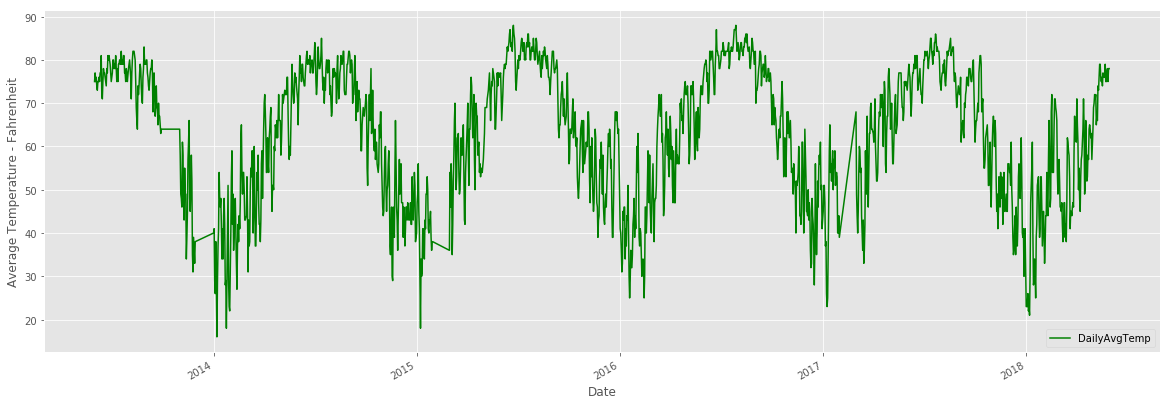

In [9]:
# Visualize some of the 'cleaned' data by plotting the daily avg temperature in Charlotte from 2013 to 2018
new_clt_climate_df['DailyAvgTemp'].plot(figsize=(20,7), color="green")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Average Temperature - Fahrenheit')
plt.show()

## Derive Features for Weather Prediction Experiment

In [10]:
features = ['DailyMaxTemp','DailyMinTemp','DailyAvgTemp','DailyAvgRelHumidity','DailyAvgDewPointTemp','DailyPrecip']
# Function that creates columns representing Nth prior measurements of feature
# None values maintain the consistent rows length for each N
def derive_nth_day_feature(new_clt_climate_df, feature, N):  
    rows = new_clt_climate_df.shape[0]
    nth_prior_measurements = [None]*N + [new_clt_climate_df[feature][i-N] for i in range(N, rows)]
    col_name = "{}_{}".format(feature, N)
    new_clt_climate_df[col_name] = nth_prior_measurements

In [11]:
# Call the above function using a loop through each feature
for feature in features:  
    if feature != 'DATE':
        for N in range(1, 4):
            derive_nth_day_feature(new_clt_climate_df, feature, N)

In [12]:
new_clt_climate_df.head(32)

STATION_NAME  DailyMaxTemp  DailyMinTemp  \
DATE                                                                      
2013-06-01  CHARLOTTE DOUGLAS AIRPORT NC US          85.0          66.0   
2013-06-02  CHARLOTTE DOUGLAS AIRPORT NC US          84.0          69.0   
2013-06-03  CHARLOTTE DOUGLAS AIRPORT NC US          83.0          67.0   
2013-06-04  CHARLOTTE DOUGLAS AIRPORT NC US          84.0          68.0   
2013-06-05  CHARLOTTE DOUGLAS AIRPORT NC US          81.0          68.0   
2013-06-06  CHARLOTTE DOUGLAS AIRPORT NC US          78.0          68.0   
2013-06-07  CHARLOTTE DOUGLAS AIRPORT NC US          82.0          68.0   
2013-06-08  CHARLOTTE DOUGLAS AIRPORT NC US          83.0          67.0   
2013-06-09  CHARLOTTE DOUGLAS AIRPORT NC US          86.0          67.0   
2013-06-10  CHARLOTTE DOUGLAS AIRPORT NC US          83.0          68.0   
2013-06-11  CHARLOTTE DOUGLAS AIRPORT NC US          87.0          67.0   
2013-06-12  CHARLOTTE DOUGLAS AIRPORT NC US          90.0          64.0   
2013-06-13  CHARLOTTE DOUGLAS AIRPORT NC US          92.0          69.0   
2013-06-14  CHARLOTTE DOUGLAS AIRPORT NC US          83.0          60.0   
2013-06-15  CHARLOTTE DOUGLAS AIRPORT NC US          84.0          57.0   
2013-06-16  CHARLOTTE DOUGLAS AIRPORT NC US          85.0          65.0   
2013-06-17  CHARLOTTE DOUGLAS AIRPORT NC US          85.0          71.0   
2013-06-18  CHARLOTTE DOUGLAS AIRPORT NC US          84.0          70.0   
2013-06-19  CHARLOTTE DOUGLAS AIRPORT NC US          84.0          69.0   
2013-06-20  CHARLOTTE DOUGLAS AIRPORT NC US          84.0          68.0   
2013-06-21  CHARLOTTE DOUGLAS AIRPORT NC US          84.0          66.0   
2013-06-22  CHARLOTTE DOUGLAS AIRPORT NC US          86.0          62.0   
2013-06-23  CHARLOTTE DOUGLAS AIRPORT NC US          86.0          69.0   
2013-06-24  CHARLOTTE DOUGLAS AIRPORT NC US          85.0          69.0   
2013-06-25  CHARLOTTE DOUGLAS AIRPORT NC US          89.0          72.0   
2013-06-26  CHARLOTTE DOUGLAS AIRPORT NC US          90.0          70.0   
2013-06-27  CHARLOTTE DOUGLAS AIRPORT NC US          89.0          72.0   
2013-06-28  CHARLOTTE DOUGLAS AIRPORT NC US          91.0          69.0   
2013-06-29  CHARLOTTE DOUGLAS AIRPORT NC US          86.0          71.0   
2013-07-01  CHARLOTTE DOUGLAS AIRPORT NC US          83.0          68.0   
2013-07-02  CHARLOTTE DOUGLAS AIRPORT NC US          80.0          71.0   
2013-07-03  CHARLOTTE DOUGLAS AIRPORT NC US          82.0          72.0   

            DailyAvgTemp  DailyAvgRelHumidity  DailyAvgDewPointTemp  \
DATE                                                                  
2013-06-01          75.0                 68.0                  65.0   
2013-06-02          77.0                 78.0                  66.0   
2013-06-03          75.0                 83.0                  67.0   
2013-06-04          76.0                 70.0                  64.0   
2013-06-05          74.0                 81.0                  67.0   
2013-06-06          73.0                 94.0                  69.0   
2013-06-07          75.0                 88.0                  68.0   
2013-06-08          75.0                 80.0                  67.0   
2013-06-09          76.0                 82.0                  68.0   
2013-06-10          75.0                 87.0                  69.0   
2013-06-11          77.0                 71.0                  66.0   
2013-06-12          77.0                 73.0                  69.0   
2013-06-13          81.0                 77.0                  70.0   
2013-06-14          72.0                 60.0                  57.0   
2013-06-15          71.0                 66.0                  60.0   
2013-06-16          75.0                 69.0                  64.0   
2013-06-17          78.0                 83.0                  69.0   
2013-06-18          77.0                 86.0                  70.0   
2013-06-19          77.0                 69.0               

In [13]:
# Evaluate the distribution of the feature data and transpose it; drop latitude and longitude values
spread = new_clt_climate_df.describe().T
spread

count       mean        std   min   25%   50%    75%  \
DailyMaxTemp            1651.0  73.609933  15.500866  26.0  62.0  76.0  86.00   
DailyMinTemp            1651.0  51.928528  16.196924   5.0  39.0  55.0  67.00   
DailyAvgTemp            1651.0  62.815263  15.366170  16.0  51.0  65.0  76.00   
DailyAvgRelHumidity     1651.0  64.890975  14.879809  26.0  55.0  65.0  76.00   
DailyAvgDewPointTemp    1651.0  49.496669  17.611304  -4.0  36.0  54.0  65.00   
DailyPrecip             1651.0   0.121532   0.344428   0.0   0.0   0.0   0.03   
DailyMaxTemp_1          1650.0  73.603030  15.503027  26.0  62.0  76.0  86.00   
DailyMaxTemp_2          1649.0  73.596119  15.505187  26.0  62.0  76.0  86.00   
DailyMaxTemp_3          1648.0  73.593447  15.509513  26.0  62.0  76.0  86.00   
DailyMinTemp_1          1650.0  51.916364  16.194288   5.0  39.0  55.0  67.00   
DailyMinTemp_2          1649.0  51.904184  16.191640   5.0  39.0  55.0  67.00   
DailyMinTemp_3          1648.0  51.892597  16.189714   5.0  39.0  55.0  67.00   
DailyAvgTemp_1          1650.0  62.806061  15.366277  16.0  51.0  65.0  76.00   
DailyAvgTemp_2          1649.0  62.796847  15.366378  16.0  51.0  65.0  76.00   
DailyAvgTemp_3          1648.0  62.789442  15.368099  16.0  51.0  65.0  76.00   
DailyAvgRelHumidity_1   1650.0  64.880000  14.877634  26.0  55.0  65.0  76.00   
DailyAvgRelHumidity_2   1649.0  64.864767  14.869269  26.0  55.0  65.0  76.00   
DailyAvgRelHumidity_3   1648.0  64.848301  14.858737  26.0  55.0  65.0  76.00   
DailyAvgDewPointTemp_1  1650.0  49.483030  17.607919  -4.0  36.0  54.0  65.00   
DailyAvgDewPointTemp_2  1649.0  49.468769  17.603726  -4.0  36.0  54.0  65.00   
DailyAvgDewPointTemp_3  1648.0  49.455704  17.601070  -4.0  36.0  54.0  65.00   
DailyPrecip_1           1650.0   0.121606   0.344519   0.0   0.0   0.0   0.03   
DailyPrecip_2           1649.0   0.121364   0.344484   0.0   0.0   0.0   0.03   
DailyPrecip_3           1648.0   0.121317   0.344583   0.0   0.0   0.0   0.03   

                           max  
DailyMaxTemp            100.00  
DailyMinTemp             78.00  
DailyAvgTemp             88.00  
DailyAvgRelHumidity      98.00  
DailyAvgDewPointTemp     75.00  
DailyPrecip               3.89  
DailyMaxTemp_1          100.00  
DailyMaxTemp_2          100.00  
DailyMaxTemp_3          100.00  
DailyMinTemp_1           78.00  
DailyMinTemp_2           78.00  
DailyMinTemp_3           78.00  
DailyAvgTemp_1           88.00  
DailyAvgTemp_2           88.00  
DailyAvgTemp_3           88.00  
DailyAvgRelHumidity_1    98.00  
DailyAvgRelHumidity_2    98.00  
DailyAvgRelHumidity_3    98.00  
DailyAvgDewPointTemp_1   75.00  
DailyAvgDewPointTemp_2   75.00  
DailyAvgDewPointTemp_3   75.00  
DailyPrecip_1             3.89  
DailyPrecip_2             3.89  
DailyPrecip_3             3.89

In [14]:
# Drop rows with NaN values
new_clt_climate_df = new_clt_climate_df.dropna()  
new_clt_climate_df.head()

STATION_NAME  DailyMaxTemp  DailyMinTemp  \
DATE                                                                      
2013-06-04  CHARLOTTE DOUGLAS AIRPORT NC US          84.0          68.0   
2013-06-05  CHARLOTTE DOUGLAS AIRPORT NC US          81.0          68.0   
2013-06-06  CHARLOTTE DOUGLAS AIRPORT NC US          78.0          68.0   
2013-06-07  CHARLOTTE DOUGLAS AIRPORT NC US          82.0          68.0   
2013-06-08  CHARLOTTE DOUGLAS AIRPORT NC US          83.0          67.0   

            DailyAvgTemp  DailyAvgRelHumidity  DailyAvgDewPointTemp  \
DATE                                                                  
2013-06-04          76.0                 70.0                  64.0   
2013-06-05          74.0                 81.0                  67.0   
2013-06-06          73.0                 94.0                  69.0   
2013-06-07          75.0                 88.0                  68.0   
2013-06-08          75.0                 80.0                  67.0   

            DailyPrecip  DailyMaxTemp_1  DailyMaxTemp_2  DailyMaxTemp_3  \
DATE                                                                      
2013-06-04         0.00            83.0            84.0            85.0   
2013-06-05         0.03            84.0            83.0            84.0   
2013-06-06         1.12            81.0            84.0            83.0   
2013-06-07         0.72            78.0            81.0            84.0   
2013-06-08         0.00            82.0            78.0            81.0   

                ...        DailyAvgTemp_3  DailyAvgRelHumidity_1  \
DATE            ...                                                
2013-06-04      ...                  75.0                   83.0   
2013-06-05      ...                  77.0                   70.0   
2013-06-06      ...                  75.0                   81.0   
2013-06-07      ...                  76.0                   94.0   
2013-06-08      ...                  74.0                   88.0   

            DailyAvgRelHumidity_2  DailyAvgRelHumidity_3  \
DATE                                                       
2013-06-04                   78.0                   68.0   
2013-06-05                   83.0                   78.0   
2013-06-06                   70.0                   83.0   
2013-06-07                   81.0                   70.0   
2013-06-08                   94.0                   81.0   

            DailyAvgDewPointTemp_1  DailyAvgDewPointTemp_2  \
DATE                                                         
2013-06-04                    67.0                    66.0   
2013-06-05                    64.0                    67.0   
2013-06-06                    67.0                    64.0   
2013-06-07                    69.0                    67.0   
2013-06-08                    68.0                    69.0   

            DailyAvgDewPointTemp_3  DailyPrecip_1  DailyPrecip_2  \
DATE                                                               
2013-06-04                    65.0           2.33           0.19   
2013-06-05                    66.0           0.00           2.33   
2013-06-06                    67.0           0.03           0.00   
2013-06-07                    64.0           1.12           0.03   
2013-06-08                    67.0           0.72           1.12   

            DailyPrecip_3  
DATE                       
2013-06-04           0.00  
2013-06-05           0.19  
2013-06-06           2.33  
2013-06-07           0.00  
2013-06-08           0.03  

[5 rows x 25 columns]

In [15]:
# Assess the linearity between variables using the Pearson correlation coefficient. 
df_linear = new_clt_climate_df.corr()[['DailyAvgTemp']].sort_values('DailyAvgTemp')
df_linear

DailyAvgTemp
DailyPrecip_2              -0.038175
DailyPrecip_3              -0.019563
DailyPrecip_1              -0.010878
DailyPrecip                 0.010496
DailyAvgRelHumidity_3       0.208985
DailyAvgRelHumidity_2       0.219423
DailyAvgRelHumidity_1       0.295778
DailyAvgRelHumidity         0.334309
DailyAvgDewPointTemp_3      0.757075
DailyAvgDewPointTemp_2      0.790034
DailyMinTemp_3              0.801019
DailyMaxTemp_3              0.808100
DailyAvgTemp_3              0.826574
DailyMinTemp_2              0.831432
DailyMaxTemp_2              0.845655
DailyAvgTemp_2              0.861624
DailyAvgDewPointTemp_1      0.873512
DailyMinTemp_1              0.898852
DailyMaxTemp_1              0.912172
DailyAvgTemp_1              0.930317
DailyAvgDewPointTemp        0.939037
DailyMaxTemp                0.971456
DailyMinTemp                0.973825
DailyAvgTemp                1.000000

## Visualizing Feature Relationships

In [16]:
# Create new dataframe with features of interest
predictors = ['DailyMaxTemp_1','DailyMaxTemp_2','DailyMaxTemp_3','DailyMinTemp_1','DailyMinTemp_2','DailyMinTemp_3','DailyAvgTemp_1','DailyAvgTemp_2','DailyAvgTemp_3','DailyAvgDewPointTemp_1','DailyAvgDewPointTemp_2','DailyAvgDewPointTemp_3']
new_clt_climate_df2 = new_clt_climate_df[['DailyAvgTemp'] + predictors] 
new_clt_climate_df2.head()

DailyAvgTemp  DailyMaxTemp_1  DailyMaxTemp_2  DailyMaxTemp_3  \
DATE                                                                       
2013-06-04          76.0            83.0            84.0            85.0   
2013-06-05          74.0            84.0            83.0            84.0   
2013-06-06          73.0            81.0            84.0            83.0   
2013-06-07          75.0            78.0            81.0            84.0   
2013-06-08          75.0            82.0            78.0            81.0   

            DailyMinTemp_1  DailyMinTemp_2  DailyMinTemp_3  DailyAvgTemp_1  \
DATE                                                                         
2013-06-04            67.0            69.0            66.0            75.0   
2013-06-05            68.0            67.0            69.0            76.0   
2013-06-06            68.0            68.0            67.0            74.0   
2013-06-07            68.0            68.0            68.0            73.0   
2013-06-08            68.0            68.0            68.0            75.0   

            DailyAvgTemp_2  DailyAvgTemp_3  DailyAvgDewPointTemp_1  \
DATE                                                                 
2013-06-04            77.0            75.0                    67.0   
2013-06-05            75.0            77.0                    64.0   
2013-06-06            76.0            75.0                    67.0   
2013-06-07            74.0            76.0                    69.0   
2013-06-08            73.0            74.0                    68.0   

            DailyAvgDewPointTemp_2  DailyAvgDewPointTemp_3  
DATE                                                        
2013-06-04                    66.0                    65.0  
2013-06-05                    67.0                    66.0  
2013-06-06                    64.0                    67.0  
2013-06-07                    67.0                    64.0  
2013-06-08                    69.0                    67.0

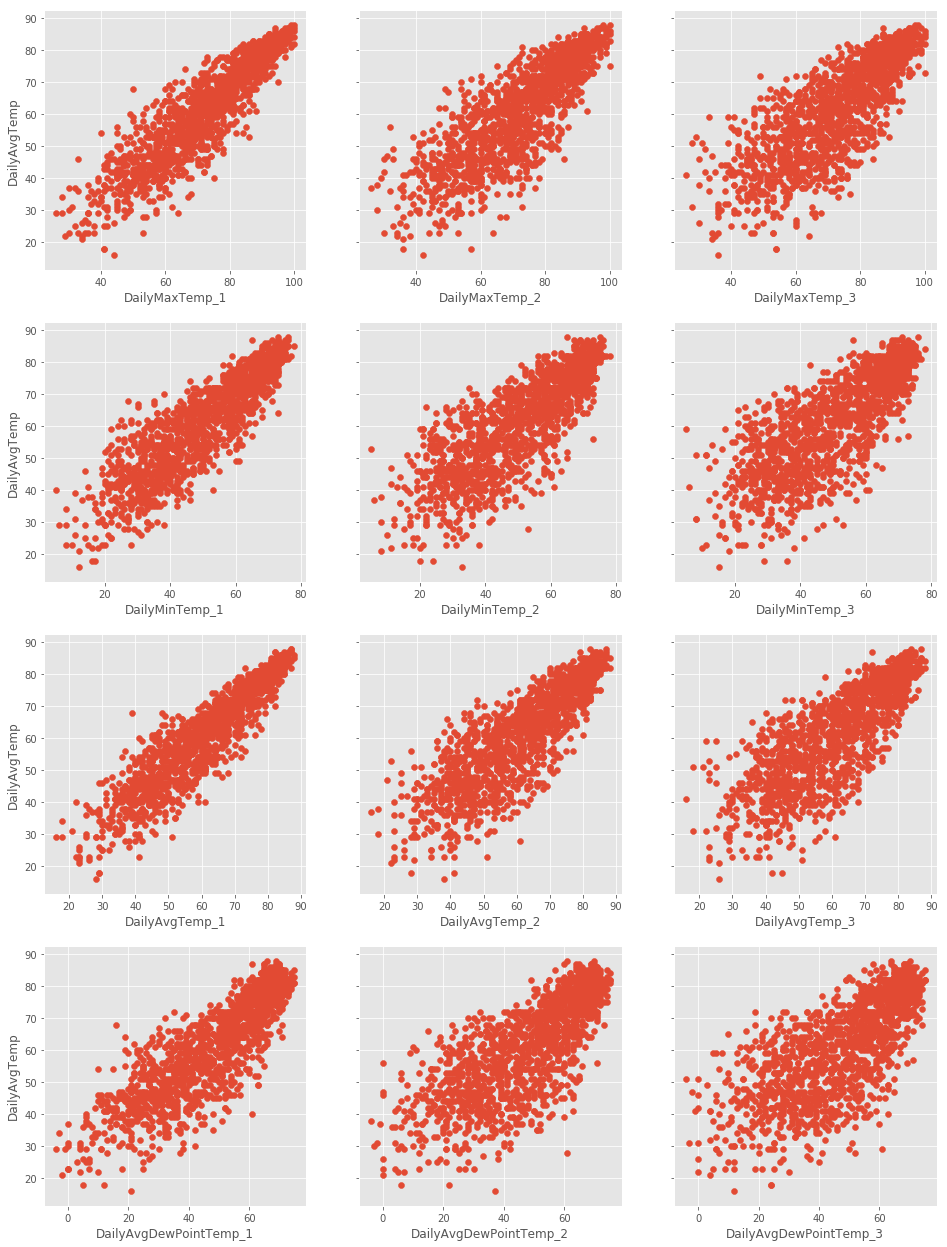

In [17]:
%matplotlib inline

# Manually set the parameters of the figure to an appropriate size
plt.rcParams['figure.figsize'] = [16, 22]

# Call subplots specifying the desired grid structure
# The y axes should be shared
fig, axes = plt.subplots(nrows=4, ncols=3, sharey=True)

# Loop through the features that will be the predictors to build the plot
# Rearrange data into a 2D array of 4 rows and 3 columns
arr = np.array(predictors).reshape(4, 3)

# Use enumerate to loop over the 2D array of rows and columns
# Create scatter plots of each DailyAvgTemp vs each feature; DailyAvgTemp will be the dependent variable
for row, col_arr in enumerate(arr):  
    for col, feature in enumerate(col_arr):
        axes[row, col].scatter(new_clt_climate_df2[feature], new_clt_climate_df2['DailyAvgTemp'])
        if col == 0:
            axes[row, col].set(xlabel=feature, ylabel='DailyAvgTemp')
        else:
            axes[row, col].set(xlabel=feature)
plt.show() 

##  Using Step-wise Regression to Build a Model

To test for the effects of interactions on the significance of any one variable in a linear regression model a technique known as step-wise regression is often applied. 
Using step-wise regression you add or remove variables from the model and assess the statistical significance of each variable on the resultant model.

A backward elimination technique will be applied using the following steps:
1. Select a significance level Α for which you test your hypothesis against to determine if a variable should stay in the model
1. Fit the model with all predictor variables
1. Evaluate the p-values of the βj coefficients and for the one with the greatest p-value, if p-value > Α progress to step 4, if not you have your final model
1. Remove the predictor identified in step 3
1. Fit the model again but, this time without the removed variable and cycle back to step 3

These steps will help to select statistically meaningful predictors (features)

In [18]:
# Separate predictor variables (X) from the outcome variable y
X = new_clt_climate_df2[predictors]  
y = new_clt_climate_df2['DailyAvgTemp']

# Add a constant to the predictor variable set to represent the Bo intercept
X = sm.add_constant(X)  
X.iloc[:5, :5]  

const  DailyMaxTemp_1  DailyMaxTemp_2  DailyMaxTemp_3  \
DATE                                                                
2013-06-04    1.0            83.0            84.0            85.0   
2013-06-05    1.0            84.0            83.0            84.0   
2013-06-06    1.0            81.0            84.0            83.0   
2013-06-07    1.0            78.0            81.0            84.0   
2013-06-08    1.0            82.0            78.0            81.0   

            DailyMinTemp_1  
DATE                        
2013-06-04            67.0  
2013-06-05            68.0  
2013-06-06            68.0  
2013-06-07            68.0  
2013-06-08            68.0

In [19]:
# Step 1 - Select a significance value
alpha = 0.05

# Step 2 - Fit the model
model = sm.OLS(y, X).fit()

# Step 3 - Evaluate the coefficients' p-values
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DailyAvgTemp   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     996.7
Date:                Fri, 27 Jul 2018   Prob (F-statistic):               0.00
Time:                        09:23:19   Log-Likelihood:                -5095.7
No. Observations:                1648   AIC:                         1.022e+04
Df Residuals:                    1635   BIC:                         1.029e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2.5851      0.871      2.967      0.003       0.876       4.294
DailyMaxTemp_1             0.5111      0.191      2.677      0.008       0.137       0.886
DailyMaxTemp_2            -0.0791      0.192     -0.412      0.680      -0.456       0.297
DailyMaxTemp_3             0.0909      0.192      0.474      0.635      -0.285       0.467
DailyMinTemp_1             0.3138      0.192      1.631      0.103      -0.064       0.691
DailyMinTemp_2            -0.0406      0.193     -0.211      0.833      -0.419       0.337
DailyMinTemp_3             0.1895      0.192      0.986      0.324      -0.188       0.567
DailyAvgTemp_1            -0.0702      0.381     -0.184      0.854      -0.817       0.676
DailyAvgTemp_2             0.2006      0.381      0.527      0.598      -0.546       0.947
DailyAvgTemp_3            -0.1572      0.381     -0.413      0.680      -0.904       0.589
DailyAvgDewPointTemp_1     0.1836      0.030      6.222      0.000       0.126       0.241
DailyAvgDewPointTemp_2    -0.2744      0.033     -8.358      0.000      -0.339      -0.210
DailyAvgDewPointTemp_3     0.0788      0.030      2.654      0.008       0.021       0.137
==============================================================================
Omnibus:                      104.109   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.064
Skew:                          -0.412   Prob(JB):                     4.45e-48
Kurtosis:                       4.580   Cond. No.                     1.43e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# Step 3 (cont.) - Identify the predictor with the greatest p-value and assess if its greater than the selected alpha.
# Based off the table, DailyAvgTemp_1 has the greatest p-value and it is greater than alpha of 0.05

# Step 4 - Use pandas drop function to remove this column from X
X = X.drop('DailyAvgTemp_1', axis=1)

# Step 5 - Fit the model 
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DailyAvgTemp   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1088.
Date:                Fri, 27 Jul 2018   Prob (F-statistic):               0.00
Time:                        09:23:19   Log-Likelihood:                -5095.7
No. Observations:                1648   AIC:                         1.022e+04
Df Residuals:                    1636   BIC:                         1.028e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2.5664      0.865      2.966      0.003       0.870       4.263
DailyMaxTemp_1             0.4761      0.023     20.320      0.000       0.430       0.522
DailyMaxTemp_2            -0.0777      0.192     -0.405      0.685      -0.454       0.298
DailyMaxTemp_3             0.0923      0.191      0.483      0.629      -0.283       0.468
DailyMinTemp_1             0.2790      0.037      7.443      0.000       0.205       0.352
DailyMinTemp_2            -0.0392      0.193     -0.204      0.839      -0.417       0.338
DailyMinTemp_3             0.1907      0.192      0.993      0.321      -0.186       0.567
DailyAvgTemp_2             0.1975      0.380      0.519      0.604      -0.548       0.943
DailyAvgTemp_3            -0.1599      0.380     -0.421      0.674      -0.905       0.586
DailyAvgDewPointTemp_1     0.1836      0.029      6.223      0.000       0.126       0.241
DailyAvgDewPointTemp_2    -0.2743      0.033     -8.359      0.000      -0.339      -0.210
DailyAvgDewPointTemp_3     0.0788      0.030      2.656      0.008       0.021       0.137
==============================================================================
Omnibus:                      104.176   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.831
Skew:                          -0.412   Prob(JB):                     5.00e-48
Kurtosis:                       4.579   Cond. No.                     1.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# Repeat steps 1 - 5 to continue identifying predictors with the greatest p-value that are greater than alpha (0.05)
# ROUND 2
X = X.drop('DailyMinTemp_2', axis=1)
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DailyAvgTemp   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1197.
Date:                Fri, 27 Jul 2018   Prob (F-statistic):               0.00
Time:                        09:23:19   Log-Likelihood:                -5095.7
No. Observations:                1648   AIC:                         1.021e+04
Df Residuals:                    1637   BIC:                         1.027e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2.5912      0.856      3.026      0.003       0.912       4.271
DailyMaxTemp_1             0.4760      0.023     20.328      0.000       0.430       0.522
DailyMaxTemp_2            -0.0398      0.048     -0.832      0.406      -0.134       0.054
DailyMaxTemp_3             0.0904      0.191      0.473      0.636      -0.284       0.465
DailyMinTemp_1             0.2786      0.037      7.444      0.000       0.205       0.352
DailyMinTemp_3             0.1887      0.192      0.984      0.325      -0.187       0.565
DailyAvgTemp_2             0.1216      0.077      1.572      0.116      -0.030       0.273
DailyAvgTemp_3            -0.1564      0.380     -0.412      0.680      -0.901       0.588
DailyAvgDewPointTemp_1     0.1838      0.029      6.241      0.000       0.126       0.242
DailyAvgDewPointTemp_2    -0.2752      0.033     -8.465      0.000      -0.339      -0.211
DailyAvgDewPointTemp_3     0.0790      0.030      2.663      0.008       0.021       0.137
==============================================================================
Omnibus:                      104.325   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.275
Skew:                          -0.413   Prob(JB):                     4.00e-48
Kurtosis:                       4.580   Cond. No.                     1.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# Repeat steps 1 - 5 to continue identifying predictors with the greatest p-value that are greater than alpha (0.05)
# ROUND 3
X = X.drop('DailyAvgTemp_3', axis=1)
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DailyAvgTemp   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1331.
Date:                Fri, 27 Jul 2018   Prob (F-statistic):               0.00
Time:                        09:23:20   Log-Likelihood:                -5095.8
No. Observations:                1648   AIC:                         1.021e+04
Df Residuals:                    1638   BIC:                         1.027e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2.5444      0.849      2.999      0.003       0.880       4.209
DailyMaxTemp_1             0.4758      0.023     20.330      0.000       0.430       0.522
DailyMaxTemp_2            -0.0392      0.048     -0.820      0.413      -0.133       0.055
DailyMaxTemp_3             0.0124      0.025      0.495      0.621      -0.037       0.062
DailyMinTemp_1             0.2781      0.037      7.437      0.000       0.205       0.351
DailyMinTemp_3             0.1109      0.034      3.269      0.001       0.044       0.178
DailyAvgTemp_2             0.1213      0.077      1.568      0.117      -0.030       0.273
DailyAvgDewPointTemp_1     0.1842      0.029      6.258      0.000       0.126       0.242
DailyAvgDewPointTemp_2    -0.2753      0.033     -8.471      0.000      -0.339      -0.212
DailyAvgDewPointTemp_3     0.0790      0.030      2.664      0.008       0.021       0.137
==============================================================================
Omnibus:                      104.750   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.857
Skew:                          -0.415   Prob(JB):                     2.99e-48
Kurtosis:                       4.581   Cond. No.                     1.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# Repeat steps 1 - 5 to continue identifying predictors with the greatest p-value that are greater than alpha (0.05)
# ROUND 4
X = X.drop('DailyMaxTemp_3', axis=1)
model = sm.OLS(y, X).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DailyAvgTemp   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1498.
Date:                Fri, 27 Jul 2018   Prob (F-statistic):               0.00
Time:                        09:23:20   Log-Likelihood:                -5095.9
No. Observations:                1648   AIC:                         1.021e+04
Df Residuals:                    1639   BIC:                         1.026e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2.6928      0.794      3.394      0.001       1.136       4.249
DailyMaxTemp_1             0.4759      0.023     20.335      0.000       0.430       0.522
DailyMaxTemp_2            -0.0368      0.048     -0.773      0.440      -0.130       0.057
DailyMinTemp_1             0.2779      0.037      7.434      0.000       0.205       0.351
DailyMinTemp_3             0.1133      0.034      3.373      0.001       0.047       0.179
DailyAvgTemp_2             0.1294      0.076      1.712      0.087      -0.019       0.278
DailyAvgDewPointTemp_1     0.1847      0.029      6.279      0.000       0.127       0.242
DailyAvgDewPointTemp_2    -0.2801      0.031     -9.030      0.000      -0.341      -0.219
DailyAvgDewPointTemp_3     0.0825      0.029      2.867      0.004       0.026       0.139
==============================================================================
Omnibus:                      104.494   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.352
Skew:                          -0.414   Prob(JB):                     3.85e-48
Kurtosis:                       4.579   Cond. No.                     1.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# Repeat steps 1 - 5 to continue identifying predictors with the greatest p-value that are greater than alpha (0.05)
# ROUND 5
X = X.drop('DailyMaxTemp_2', axis=1)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DailyAvgTemp   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1713.
Date:                Fri, 27 Jul 2018   Prob (F-statistic):               0.00
Time:                        09:23:20   Log-Likelihood:                -5096.2
No. Observations:                1648   AIC:                         1.021e+04
Df Residuals:                    1640   BIC:                         1.025e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2.5789      0.780      3.308      0.001       1.050       4.108
DailyMaxTemp_1             0.4703      0.022     21.112      0.000       0.427       0.514
DailyMinTemp_1             0.2816      0.037      7.599      0.000       0.209       0.354
DailyMinTemp_3             0.1202      0.032      3.715      0.000       0.057       0.184
DailyAvgTemp_2             0.0796      0.039      2.017      0.044       0.002       0.157
DailyAvgDewPointTemp_1     0.1852      0.029      6.298      0.000       0.127       0.243
DailyAvgDewPointTemp_2    -0.2716      0.029     -9.366      0.000      -0.328      -0.215
DailyAvgDewPointTemp_3     0.0814      0.029      2.831      0.005       0.025       0.138
==============================================================================
Omnibus:                      104.871   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.132
Skew:                          -0.414   Prob(JB):                     1.58e-48
Kurtosis:                       4.588   Cond. No.                         912.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Using the SciKit-Learn Linear Regression Module to Predict the Weather

The training and testing datasets are split into 80% training and 20% testing.

In [25]:
# A random_state of 12 is assigned to ensure getting the right random selection of data. 
# This random_state parameter is very useful for reproducibility of results.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)  

In [26]:
# Instantiate the regressor class
regressor = LinearRegression()

# Fit and build the model by fitting the regressor to the training data
regressor.fit(X_train, y_train)

# Make a prediction set using the test set
prediction = regressor.predict(X_test)

# Evaluate the prediction accuracy of the model
print("Accuracy of Linear Regression: %.2f" % regressor.score(X_test, y_test))  
print("The Mean Absolute Error: %.2f degrees fahrenheit" % mean_absolute_error(y_test, prediction))  
print("The Median Absolute Error: %.2f degrees fahrenheit" % median_absolute_error(y_test, prediction))

Accuracy of Linear Regression: 0.87
The Mean Absolute Error: 4.21 degrees fahrenheit
The Median Absolute Error: 3.23 degrees fahrenheit


## Visualizing Weather Forecast Predictions

In [27]:
# 365 days will be the number of forecast days
forecast_out = int(365)

# X contains the last 'n=forecast_out' rows for which we don't have label data
# Put those rows in a different Matrix X_forecast_out by X_forecast_out = X[end-forecast_out:end]
X_forecast_out = X[-forecast_out:]
X = X[:-forecast_out]
print ("Length of X_forecast_out:", len(X_forecast_out), "& Length of X :", len(X))

Length of X_forecast_out: 365 & Length of X : 1283


In [28]:
# Predict average temp for the next 365 days using our Model
forecast_prediction = regressor.predict(X_forecast_out)
print(forecast_prediction)

[74.08988803 76.48289048 76.06323529 76.67943821 76.76255921 71.75464742
 68.77556676 68.20170927 65.25988277 70.08273513 75.09470025 72.45827948
 74.25420213 74.72290346 72.79413622 74.82727921 76.1912386  78.03991048
 75.11709903 74.83254415 69.81460169 69.22681227 71.10103897 74.40657919
 74.85979471 76.61277046 78.0939676  78.1280564  79.85380054 77.1241294
 78.36623224 79.48164284 80.01367368 73.27875848 75.18585848 73.76735595
 76.30319451 73.21226958 72.38838819 72.6683886  70.39627495 74.54643695
 78.20608893 76.392193   81.482493   79.30021092 79.765633   80.10854999
 80.30344641 79.10072335 77.50928982 80.22450171 79.87442491 81.14378652
 82.9257422  83.56592861 81.75849096 80.03772879 78.5545092  80.800768
 80.01671746 83.05635046 82.42962656 84.30705752 83.38677927 81.49650877
 82.31824445 80.73769791 81.30364065 81.44600689 78.32610769 74.35300839
 76.4792458  76.4419579  75.29507465 76.69156802 77.52513527 76.62978186
 79.53121744 73.44610616 73.83737704 76.51751867 77.36

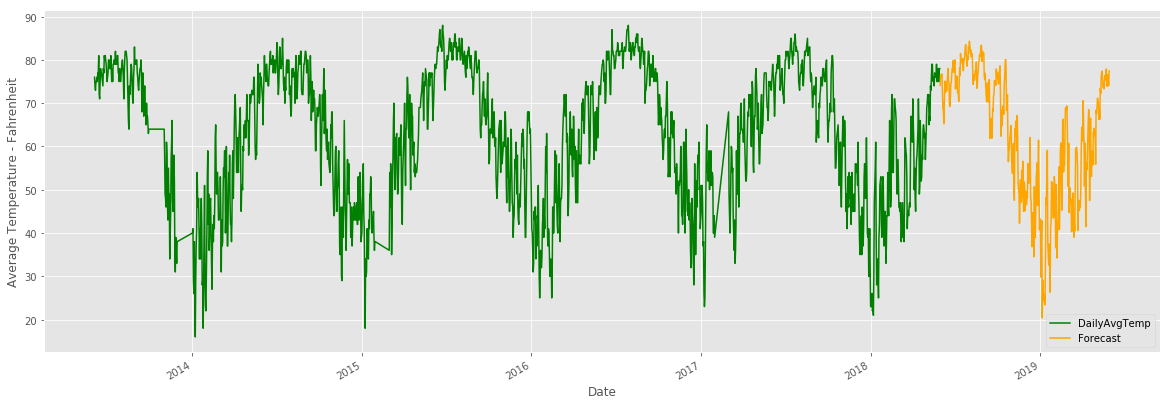

In [29]:
# Plotting data with the 365-day forecast included
new_clt_climate_df['Forecast'] = np.nan
last_date = new_clt_climate_df.iloc[-1].name
last_unix = last_date.timestamp()
# Number of seconds in a day
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_prediction:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    new_clt_climate_df.loc[next_date] = [np.nan for _ in range(len(new_clt_climate_df.columns)-1)]+[i]
new_clt_climate_df['DailyAvgTemp'].plot(figsize=(20,7), color="green")
new_clt_climate_df['Forecast'].plot(figsize=(20,7), color="orange")
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Average Temperature - Fahrenheit')
plt.show()